In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('TrainingSet.csv')

In [3]:
df.head()

,adipose_tissue,adrenal_gland,brain,breast,colon,heart,kidney,leukocyte,liver,lung,...,TSS5k_H1hescH3k27ac,TSS5k_H1hescH3k4me1,TSS5k_H1hescH3k4me3,TSS5k_K562H3k27ac,TSS5k_K562H3k4me1,TSS5k_K562H3k4me3,cancer-miRNA_targets,miRNA_targets,hbm_total_degree,hbm_cancer-protein_degree
0,0.11875,0.285,0.2375,0.11875,0.11875,0.000,0.000,0.0,0.316667,0.095,...,1.40099,0.888889,1.59273,4.98920,4.42028,2.19407,0.0,0.0,113.0,0.0
1,0.00000,0.000,0.0000,0.00000,0.00000,0.475,0.000,0.0,0.000000,0.000,...,29.11400,3.470650,21.45410,3.90171,8.30804,2.64050,0.0,0.0,716.0,0.0
2,0.00000,0.190,0.2375,0.00000,0.11875,0.000,0.000,0.0,0.000000,0.000,...,1.09134,1.245400,4.87542,1.22079,1.39571,1.36042,0.0,0.0,1253.0,1.0
3,0.00000,0.000,0.0000,0.00000,0.00000,0.000,0.000,0.0,0.000000,0.000,...,1.23263,2.263030,1.12352,1.21500,1.18454,1.37733,0.0,0.0,5455.0,15.0
4,0.11875,0.380,0.7125,0.00000,0.11875,0.475,0.285,0.0,0.000000,0.000,...,1.21965,1.817130,1.26316,1.63917,3.15974,1.81917,0.0,0.0,30.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 51 columns):
adipose_tissue               4711 non-null float64
adrenal_gland                4711 non-null float64
brain                        4711 non-null float64
breast                       4711 non-null float64
colon                        4711 non-null float64
heart                        4711 non-null float64
kidney                       4711 non-null float64
leukocyte                    4711 non-null float64
liver                        4711 non-null float64
lung                         4711 non-null float64
lymph_node                   4711 non-null float64
ovary                        4711 non-null float64
prostate_gland               4711 non-null float64
skeletal_muscle_tissue       4711 non-null float64
testis                       4711 non-null float64
thyroid_gland                4711 non-null float64
micropeptide_aa_avg          4711 non-null float64
genebody_SINE             

In [5]:
y=np.loadtxt("TrainingLabel.txt", dtype = int)

In [6]:
missc=df.isnull().sum()
missc[missc>0]

Series([], dtype: int64)

In [7]:
X=np.asarray(df)

In [8]:
X

array([[1.1875e-01, 2.8500e-01, 2.3750e-01, ..., 0.0000e+00, 1.1300e+02,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 7.1600e+02,
        0.0000e+00],
       [0.0000e+00, 1.9000e-01, 2.3750e-01, ..., 0.0000e+00, 1.2530e+03,
        1.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.4550e+03,
        1.5000e+01],
       [4.7500e+00, 1.9000e+00, 5.9375e+00, ..., 0.0000e+00, 7.0000e+00,
        0.0000e+00],
       [0.0000e+00, 9.5000e-02, 0.0000e+00, ..., 0.0000e+00, 6.9500e+02,
        0.0000e+00]])

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)  

# It is important to scale tain and val data separately because val is supposed to be unseen data on which we test our models. If we scale them together, data from val set will also be considered while calculating mean, median, IQR, etc

X_train


array([[ 2.        ,  2.33333333,  0.33333333, ...,  0.        ,
        -0.07549187, -0.125     ],
       [ 2.        ,  0.        ,  0.        , ...,  0.        ,
         0.1456373 ,  0.        ],
       [ 2.        ,  6.66666667,  1.66666667, ...,  0.        ,
        -0.06608212,  0.125     ],
       ...,
       [10.        ,  3.33333333,  1.33333333, ...,  0.        ,
        -0.07164243, -0.125     ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.07549187, -0.125     ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.25769889,  1.75      ]])

In [11]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

rf_pred=rf.predict(X_val)

#accrf=accuracy_score(rf_pred,y_val)*100
rac3=roc_auc_score(rf_pred,y_val)
#print('Accuracy: {}'.format(accrf))
print(rac3)

0.6273532668881505


In [12]:
df1=pd.read_csv("ValidSet.csv")

In [13]:
df1.head()

,adipose_tissue,adrenal_gland,brain,breast,colon,heart,kidney,leukocyte,liver,lung,...,TSS5k_H1hescH3k27ac,TSS5k_H1hescH3k4me1,TSS5k_H1hescH3k4me3,TSS5k_K562H3k27ac,TSS5k_K562H3k4me1,TSS5k_K562H3k4me3,cancer-miRNA_targets,miRNA_targets,hbm_total_degree,hbm_cancer-protein_degree
0,0.0000,0.000,0.00000,0.00000,0.35625,0.158333,0.00,0.000000,0.000000,0.475,...,1.26696,1.41547,1.719480,1.42071,8.05691,2.61817,0.0,0.0,68.0,0.0
1,0.0000,0.000,0.00000,0.11875,0.00000,0.000000,0.00,0.000000,0.316667,0.000,...,3.13681,2.72905,1.002450,23.38600,3.95775,2.94355,0.0,0.0,168.0,1.0
2,1.1875,1.900,0.83125,1.18750,0.71250,3.166670,0.95,0.678571,1.266670,0.475,...,1.02540,1.79405,0.988256,1.18682,1.57390,1.33713,5.0,6.0,26.0,0.0
3,0.0000,0.095,0.00000,0.00000,0.00000,0.000000,0.00,0.000000,0.000000,0.000,...,0.92500,2.01149,1.795920,1.24058,5.29147,1.63085,0.0,0.0,1038.0,0.0
4,0.0000,0.000,0.00000,0.00000,0.00000,0.000000,0.00,0.000000,0.000000,0.000,...,1.63040,2.49246,1.266500,1.51410,1.88364,1.63636,0.0,0.0,5455.0,15.0


In [14]:
missc=df1.isnull().sum()
missc[missc>0]

Series([], dtype: int64)

In [15]:
X1=np.asarray(df1)

In [16]:
X1

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 6.8000e+01,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.6800e+02,
        1.0000e+00],
       [1.1875e+00, 1.9000e+00, 8.3125e-01, ..., 6.0000e+00, 2.6000e+01,
        0.0000e+00],
       ...,
       [2.3750e-01, 3.8000e-01, 9.5000e-01, ..., 0.0000e+00, 1.7000e+01,
        0.0000e+00],
       [5.9375e-01, 1.9000e+00, 9.5000e-01, ..., 0.0000e+00, 5.2000e+01,
        0.0000e+00],
       [1.1875e-01, 2.8500e-01, 1.1875e+00, ..., 0.0000e+00, 2.1300e+02,
        2.0000e+00]])

In [17]:
X_test=scaler.transform(X1)

In [18]:
rf_pred1=rf.predict(X_test)

In [19]:
unique, counts = np.unique(rf_pred1, return_counts=True)

In [20]:
counts

array([7188,   65], dtype=int64)

In [31]:
probs=rf.predict_proba(X_val)
preds1=probs[:,1]

In [34]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_val,preds1)
roc_auc=metrics.auc(fpr,tpr)

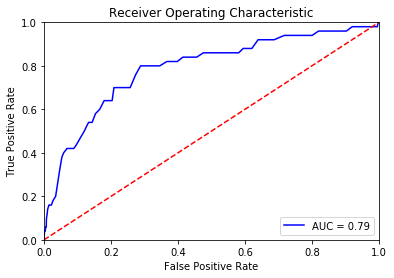

In [35]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()